In [28]:
from os import path
import pandas as pd
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [8]:
def cleanAbstract(abs):
    if type(abs) == str:
        abs.replace('[', '')
        abs.replace('"', '')
        abs = abs.strip()
        abs = abs[2:len(abs)-2]
        return abs
    else:
        return ""

def prepCloud(df):
    df['Abstract'] = df['Abstract'].apply(lambda x: cleanAbstract(x))
    #wordcloud for all the data
    allAbs = " ".join(df.Abstract)
    allAbs = allAbs.replace("xc2", '')
    allAbs = allAbs.replace("\\\\", '')
    allAbs = allAbs.replace("\\", '')
    allAbs = allAbs.lower()
    allAbs = allAbs.replace("research", ' ')
    allAbs = allAbs.replace("wellesley", ' ')
    allAbs = allAbs.replace("study", ' ')
    allAbs = allAbs.replace("one", ' ')
    allAbs = allAbs.replace("two", ' ')
    allAbs = allAbs.replace("also", ' ')
    allAbs = allAbs.replace("student", ' ')
    allAbs = allAbs.replace("use", ' ')
    allAbs = allAbs.replace("using", ' ')
    allAbs = allAbs.replace("supported", ' ')
    allAbs = allAbs.replace("new", ' ')
    allAbs = allAbs.replace("work", ' ')
    allAbs = allAbs.replace("role", ' ')
    allAbs = allAbs.replace("experience", ' ')
    allAbs = allAbs.replace("woman", ' ')
    allAbs = allAbs.replace("women", ' ')
    allAbs = allAbs.replace("cell", ' ')
    allAbs = allAbs.replace("project", ' ')
    allAbs = allAbs.replace("result", ' ')
    allAbs = allAbs.replace("results", ' ')
    allAbs = allAbs.replace("human", ' ')
    allAbs = allAbs.replace("many", ' ')
    return allAbs #this is all the text that will generate the wordcloud 

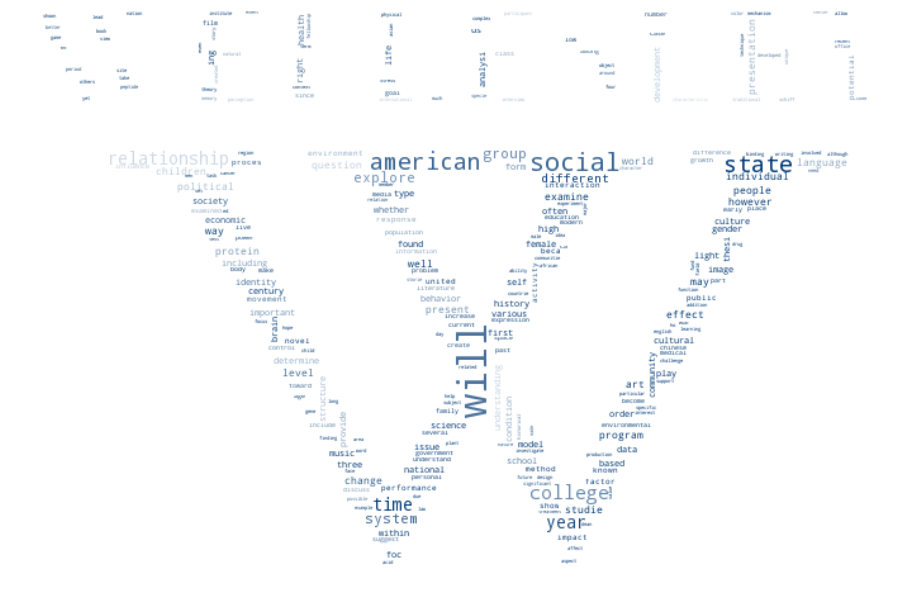

In [39]:

df = pd.read_csv('aclean.csv')
text = prepCloud(df)
d = ""
alice_mask = imread(path.join(d, "logo.png"))
image_colors = ImageColorGenerator(alice_mask)
wc = WordCloud(width=1600, height=800, background_color="white", max_words=700, mask=alice_mask,
               stopwords=STOPWORDS.add("said"))
# generate word cloud
wc.generate(text)

# store to file

# show
plt.figure(figsize=(20,10))
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
plt.show()

wc.to_file(path.join(d, "wclogo.png"))
